In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [2]:
df = pd.read_csv("Australian_Travel_Survey_Data.csv")

In [3]:
df.head()

,PERSONID,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME
0,Y09H151315P01,40,2,1,1,4,0,1,2100106,1500,21001,158,20101,213,Victoria,0,35
1,Y09H151324P01,73,1,2,1,2,1,1,2100108,703,21001,158,20101,213,Victoria,0,100
2,Y09H151340P01,85,2,2,1,1,1,1,2100108,703,21001,158,20101,213,Victoria,0,35
3,Y09H151329P01,34,2,1,1,3,1,3,2100108,703,21001,158,20101,213,Victoria,0,79
4,Y09H151325P01,68,1,2,1,3,2,3,2100108,703,21001,158,20101,213,Victoria,0,97


In [4]:
df.query("ACTIVE_TRAVEL_TIME > 0 & CAR_TIME > 0")

,PERSONID,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME
14,Y09H151332P01,63,1,1,1,2,1,2,2100108,703,21001,158,20101,213,Victoria,10,85
28,Y09H151305P04,19,2,1,1,3,2,4,2100109,1874,21001,158,20101,213,Victoria,10,23
42,Y09H154224P02,57,2,1,1,2,2,4,2100204,1042,21002,975,20101,213,Victoria,50,15
48,Y09H154228P02,62,2,2,1,2,2,2,2100204,1042,21002,975,20101,213,Victoria,29,50
52,Y09H154228P01,64,1,1,1,2,2,2,2100204,1042,21002,975,20101,213,Victoria,29,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41504,Y09H260728P01,25,2,2,1,3,1,2,3144416,736,31444,88,31606,30,Queensland,20,60
41518,Y09H260742P01,50,2,1,1,1,1,1,3144427,947,31444,88,31606,30,Queensland,6,108
41520,Y09H260730P02,33,2,1,1,3,2,5,3144427,947,31444,88,31606,30,Queensland,35,55
41527,Y09H260722P02,59,1,1,1,5,1,3,3144427,947,31444,88,31606,30,Queensland,30,13


In [5]:
# Accoding to google maps we have found that time took to travel 500 meters
# Cars = 2 mins
# Walking = 6 mins
# cycling = 2 mins

### To aggreagte the ACTIVE_TRAVEL_TIME = WALKING+CYCLING/2 = 6+2/2 = 4 mins

### Hence With Car 1 km in 4 mins and by Walking/Cycling = 8 mins.

In [6]:
df['ACTIVE_TRAVEL_TIME'] = df['ACTIVE_TRAVEL_TIME'].apply(lambda x: x/8)
df['CAR_TIME'] = df['CAR_TIME'].apply(lambda x: x/4)

In [7]:
df.drop(['PERSONID'], axis = 1, inplace = True)

In [8]:
#df['SA1_NAME'] = "NA"
df['SA2_NAME'] = "NA"
df['SA3_NAME'] = "NA"

In [9]:
df['RESULT'] = "NA"
df.loc[df.ACTIVE_TRAVEL_TIME < df.CAR_TIME,"RESULT"] = "SEDENTARY" 
df.loc[df.ACTIVE_TRAVEL_TIME > df.CAR_TIME,"RESULT"] = "ACTIVE"

In [10]:
df.loc[(df.GENDER == 1),"GENDER"] = "MALE"
df.loc[(df.GENDER == 2),"GENDER"] = "FEMALE"

In [11]:
df.loc[(df.ANYWORK == 1),"ANYWORK"] = "YES"
df.loc[(df.ANYWORK == 2),"ANYWORK"] = "NO"

In [12]:
df.loc[(df.CARLICENCE == 1),"CARLICENCE"] = "YES"
df.loc[(df.CARLICENCE == 2),"CARLICENCE"] = "NO"

In [13]:
df.query("ACTIVE_TRAVEL_TIME == CAR_TIME")

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT
224,24,FEMALE,YES,YES,5,2,5,2100232,1807,21002,975,20101,213,Victoria,2.50,2.50,NA,NA,NA
254,70,FEMALE,NO,YES,1,1,1,2100303,1025,21003,238,20101,213,Victoria,7.50,7.50,NA,NA,NA
453,56,FEMALE,NO,YES,5,1,3,2100323,1139,21003,238,20101,213,Victoria,1.25,1.25,NA,NA,NA
542,74,MALE,NO,YES,2,2,2,2100334,2060,21003,238,20101,213,Victoria,5.00,5.00,NA,NA,NA
640,53,FEMALE,YES,YES,2,2,2,2100351,762,21003,238,20101,213,Victoria,0.00,0.00,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41200,47,MALE,YES,YES,3,1,4,3144021,208,31440,17,31606,30,Queensland,0.00,0.00,NA,NA,NA
41226,40,MALE,YES,YES,3,2,3,3144106,469,31441,30,31606,30,Queensland,0.00,0.00,NA,NA,NA
41274,43,FEMALE,YES,YES,2,2,3,3144205,267,31442,71,31606,30,Queensland,0.00,0.00,NA,NA,NA
41283,47,MALE,YES,YES,2,2,3,3144205,267,31442,71,31606,30,Queensland,0.00,0.00,NA,NA,NA


### We have found 307 records which have same travel time and car time.

In [14]:
### Creating new dataframe without NA result.

df1 = df.query("ACTIVE_TRAVEL_TIME != CAR_TIME")

In [15]:
df1.query("ACTIVE_TRAVEL_TIME > 0 & CAR_TIME > 0")

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT
14,63,MALE,YES,YES,2,1,2,2100108,703,21001,158,20101,213,Victoria,1.250,21.25,NA,NA,SEDENTARY
28,19,FEMALE,YES,YES,3,2,4,2100109,1874,21001,158,20101,213,Victoria,1.250,5.75,NA,NA,SEDENTARY
42,57,FEMALE,YES,YES,2,2,4,2100204,1042,21002,975,20101,213,Victoria,6.250,3.75,NA,NA,ACTIVE
48,62,FEMALE,NO,YES,2,2,2,2100204,1042,21002,975,20101,213,Victoria,3.625,12.50,NA,NA,SEDENTARY
52,64,MALE,YES,YES,2,2,2,2100204,1042,21002,975,20101,213,Victoria,3.625,12.50,NA,NA,SEDENTARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41504,25,FEMALE,NO,YES,3,1,2,3144416,736,31444,88,31606,30,Queensland,2.500,15.00,NA,NA,SEDENTARY
41518,50,FEMALE,YES,YES,1,1,1,3144427,947,31444,88,31606,30,Queensland,0.750,27.00,NA,NA,SEDENTARY
41520,33,FEMALE,YES,YES,3,2,5,3144427,947,31444,88,31606,30,Queensland,4.375,13.75,NA,NA,SEDENTARY
41527,59,MALE,YES,YES,5,1,3,3144427,947,31444,88,31606,30,Queensland,3.750,3.25,NA,NA,ACTIVE


### Creating date bins with the user defined range

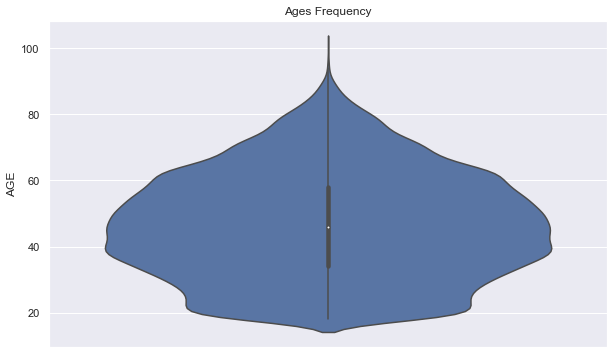

In [16]:
# Cheking age Frequency

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df1["AGE"])
plt.show()

In [17]:
bins=[18, 29, 39, 49, 59, 69, 79, 89, 101]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90 +']
df1['AGE_RANGE'] = pd.cut(df1['AGE'],bins,labels = labels, include_lowest = True)

C:\Users\bhave\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Separating active and sedentary population

In [18]:
df_active = pd.DataFrame(df1.query("ACTIVE_TRAVEL_TIME > CAR_TIME"))

In [19]:
df_active.head()

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT,AGE_RANGE
42,57,FEMALE,YES,YES,2,2,4,2100204,1042,21002,975,20101,213,Victoria,6.250,3.75,NA,NA,ACTIVE,50-59
49,60,MALE,NO,YES,2,2,2,2100204,1042,21002,975,20101,213,Victoria,2.500,0.00,NA,NA,ACTIVE,60-69
56,69,FEMALE,YES,YES,1,1,1,2100204,1042,21002,975,20101,213,Victoria,6.250,0.00,NA,NA,ACTIVE,60-69
63,64,FEMALE,NO,YES,2,2,5,2100204,1042,21002,975,20101,213,Victoria,2.500,0.00,NA,NA,ACTIVE,60-69
65,22,FEMALE,YES,YES,4,2,2,2100204,1042,21002,975,20101,213,Victoria,5.125,0.00,NA,NA,ACTIVE,18-29


In [20]:
print(df_active.shape)

(4571, 20)


In [21]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4571 entries, 42 to 41527
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AGE                 4571 non-null   int64   
 1   GENDER              4571 non-null   object  
 2   ANYWORK             4571 non-null   object  
 3   CARLICENCE          4571 non-null   object  
 4   HHSTRUCTURE         4571 non-null   int64   
 5   HH_CARS             4571 non-null   int64   
 6   HHINC_grp           4571 non-null   int64   
 7   SA1_code            4571 non-null   int64   
 8   PopDensity_SA1      4571 non-null   int64   
 9   SA2_code            4571 non-null   int64   
 10  PopDensity_SA2      4571 non-null   int64   
 11  SA3_code            4571 non-null   int64   
 12  PopDensity_SA3      4571 non-null   int64   
 13  STATE               4571 non-null   object  
 14  ACTIVE_TRAVEL_TIME  4571 non-null   float64 
 15  CAR_TIME            4571 non-null   

In [22]:
df_sed = pd.DataFrame(df1.query("ACTIVE_TRAVEL_TIME < CAR_TIME"))

In [23]:
df_sed.head()

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT,AGE_RANGE
0,40,FEMALE,YES,YES,4,0,1,2100106,1500,21001,158,20101,213,Victoria,0.0,8.75,NA,NA,SEDENTARY,40-49
1,73,MALE,NO,YES,2,1,1,2100108,703,21001,158,20101,213,Victoria,0.0,25.00,NA,NA,SEDENTARY,70-79
2,85,FEMALE,NO,YES,1,1,1,2100108,703,21001,158,20101,213,Victoria,0.0,8.75,NA,NA,SEDENTARY,80-89
3,34,FEMALE,YES,YES,3,1,3,2100108,703,21001,158,20101,213,Victoria,0.0,19.75,NA,NA,SEDENTARY,30-39
4,68,MALE,NO,YES,3,2,3,2100108,703,21001,158,20101,213,Victoria,0.0,24.25,NA,NA,SEDENTARY,60-69


In [24]:
print(df_sed.shape)

(36666, 20)


In [25]:
#bins=[18, 29, 39, 49, 59, 69, 79, 89, 101]
#labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-97']
#df_active['AGE_RANGE'] = pd.cut(df_active['AGE'],bins,labels = labels, include_lowest = True)

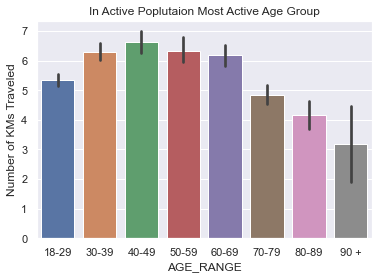

In [118]:
sns.barplot(x = "AGE_RANGE" ,y = "ACTIVE_TRAVEL_TIME", data = df_active)
plt.ylabel('Number of KMs Traveled') , plt.xlabel('AGE_RANGE')
plt.title("In Active Poplutaion Most Active Age Group")
plt.show()

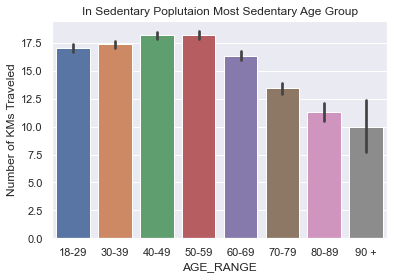

In [120]:
sns.barplot(x = "AGE_RANGE" ,y = "CAR_TIME", data = df_sed)
plt.ylabel('Number of KMs Traveled') , plt.xlabel('AGE_RANGE')
plt.title("In Sedentary Poplutaion Most Sedentary Age Group")
plt.show()

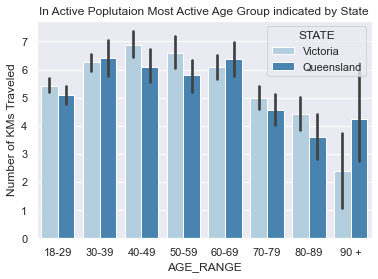

In [122]:
sns.barplot(x = 'AGE_RANGE', y = 'ACTIVE_TRAVEL_TIME', hue = 'STATE', data = df_active,
            palette = 'Blues', edgecolor = 'w')
#df_active.groupby(['AGE_RANGE','GENDER']).mean()
#sns.barplot(x = "AGE_RANGE" ,y = "CAR_TIME", data = df_sed)
plt.ylabel('Number of KMs Traveled') , plt.xlabel('AGE_RANGE')
plt.title("In Active Poplutaion Most Active Age Group indicated by State")
plt.show()

plt.show()

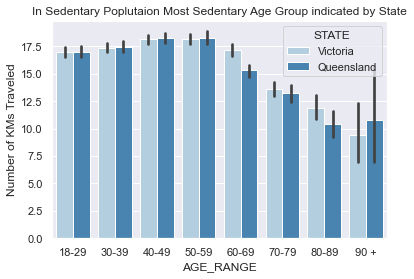

In [123]:
sns.barplot(x = 'AGE_RANGE', y = 'CAR_TIME', hue = 'STATE', data = df_sed,
            palette = 'Blues', edgecolor = 'w')
#df_active.groupby(['AGE_RANGE','GENDER']).mean()
plt.ylabel('Number of KMs Traveled') , plt.xlabel('AGE_RANGE')
plt.title("In Sedentary Poplutaion Most Sedentary Age Group indicated by State")
plt.show()


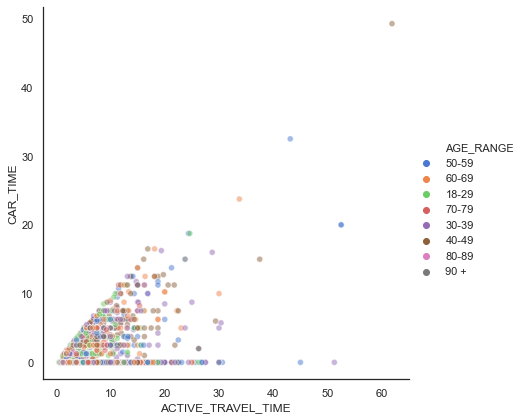

In [30]:
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset
#mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="ACTIVE_TRAVEL_TIME", y="CAR_TIME", hue="AGE_RANGE",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_active)

In [31]:
from sklearn.cluster import KMeans

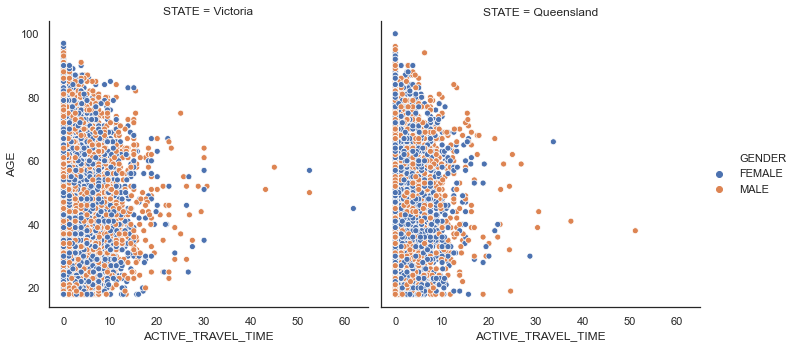

In [32]:
sns.relplot(x="ACTIVE_TRAVEL_TIME", y="AGE", hue="GENDER",col="STATE", data=df1)

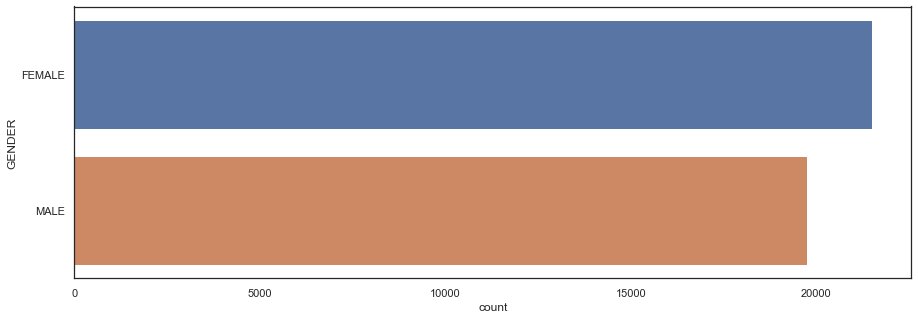

In [33]:
plt.figure(1,figsize = (15,5))
sns.countplot(y= df1['GENDER'])
plt.show()

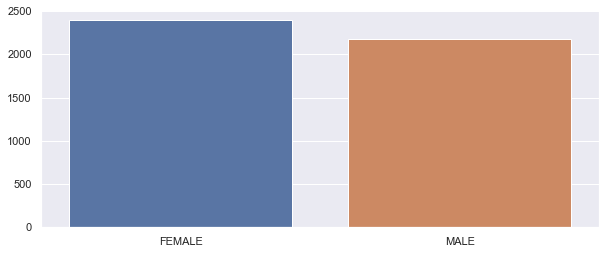

In [34]:
genders = df_active.GENDER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

### Females are more Active as compared to males

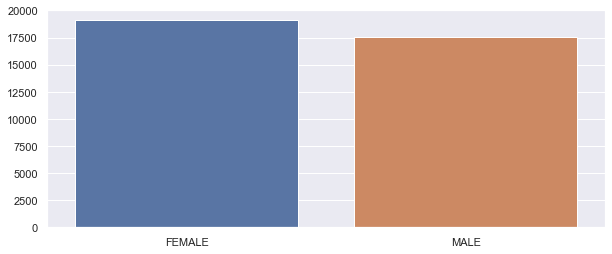

In [35]:
genders = df_sed.GENDER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [36]:
X = df1[['AGE' , 'ACTIVE_TRAVEL_TIME']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

C:\Users\bhave\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1032: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


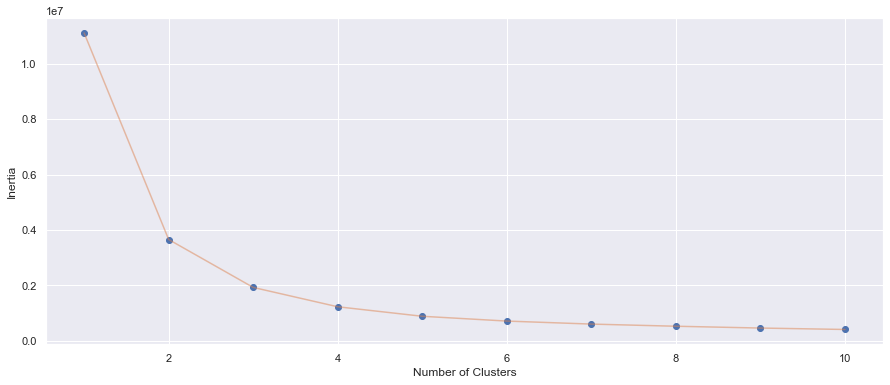

In [37]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [38]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [39]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

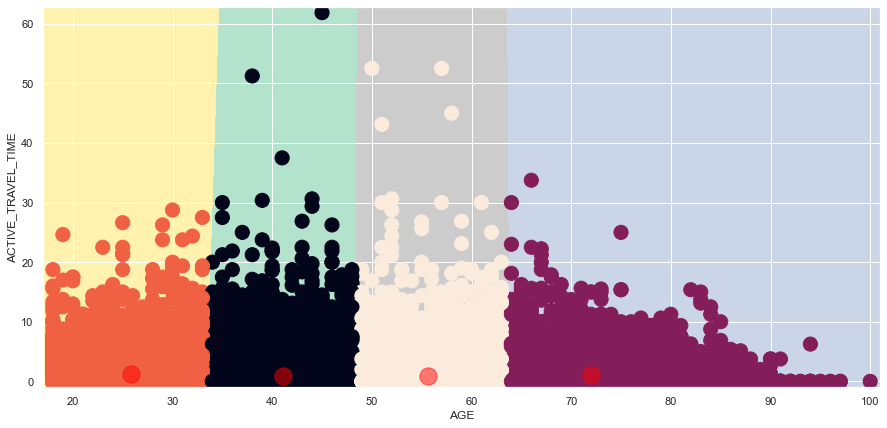

In [40]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'AGE' ,y = 'ACTIVE_TRAVEL_TIME' , data = df1 , c = labels1,s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('ACTIVE_TRAVEL_TIME') , plt.xlabel('AGE')
plt.show()

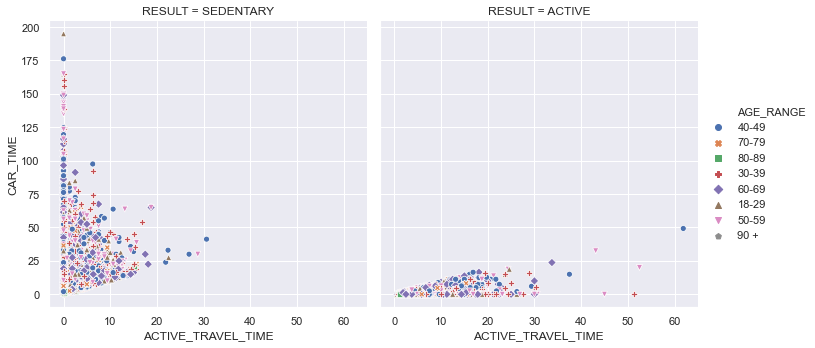

In [41]:
g = sns.relplot(x="ACTIVE_TRAVEL_TIME", y="CAR_TIME", col="RESULT", hue="AGE_RANGE", style="AGE_RANGE",kind="scatter", data=df1)

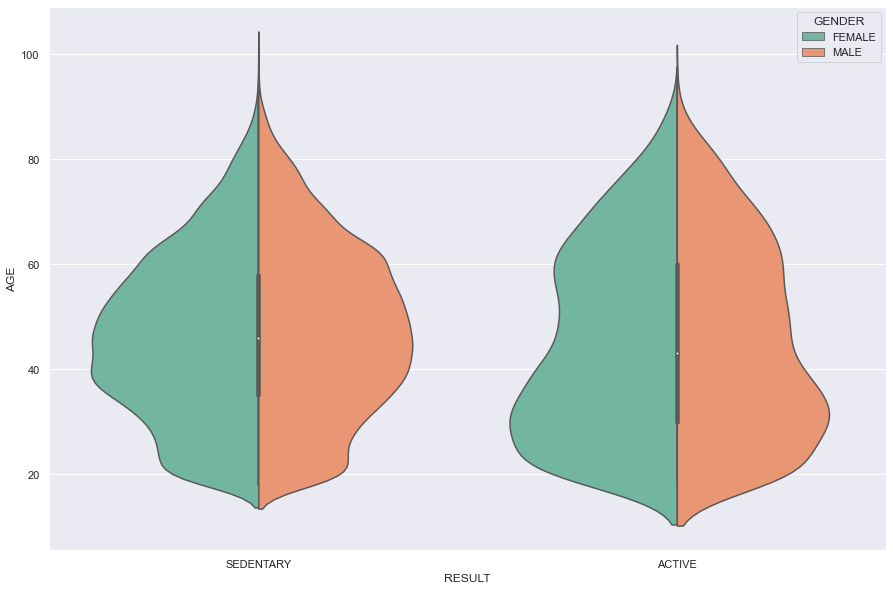

In [42]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x="RESULT", y="AGE", hue="GENDER", data=df1, palette="Set2", split=True, scale="count")


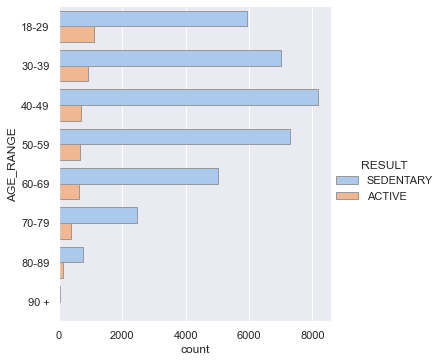

In [43]:
sns.catplot(y="AGE_RANGE", hue="RESULT", kind="count",palette="pastel", edgecolor=".6", data=df1);

In [44]:
# In Active people how many of them is having any work

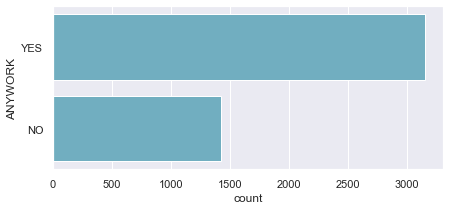

In [45]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="ANYWORK", data=df_active, color="c");

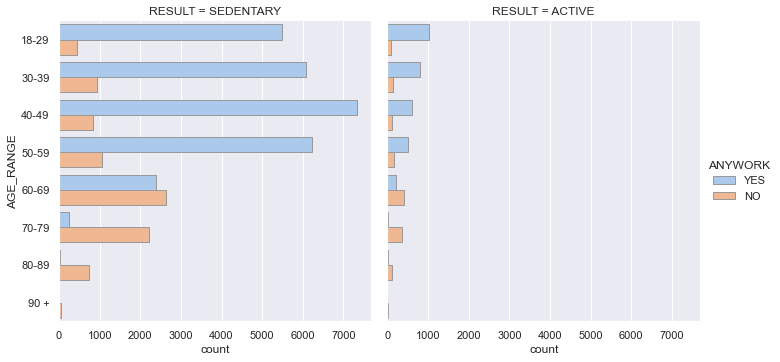

In [46]:
sns.catplot(y="AGE_RANGE", hue="ANYWORK", kind="count",palette="pastel", edgecolor=".6", col = "RESULT", data=df1);

In [47]:
# In Sedentary people how many of them is having any work

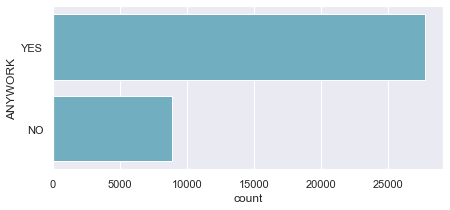

In [48]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="ANYWORK", data=df_sed, color="c");

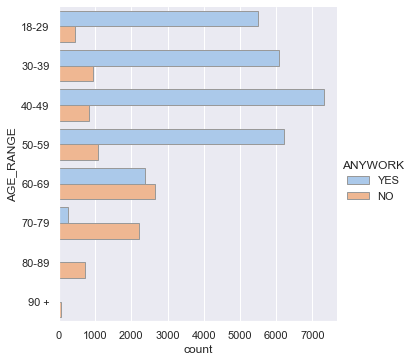

In [49]:
sns.catplot(y="AGE_RANGE", hue="ANYWORK", kind="count",palette="pastel", edgecolor=".6", data=df_sed);

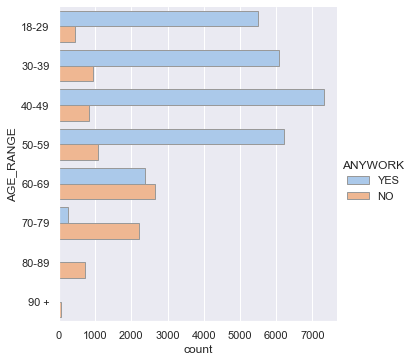

In [50]:
sns.catplot(y="AGE_RANGE", hue="ANYWORK", kind="count",palette="pastel", edgecolor=".6", data=df_sed);

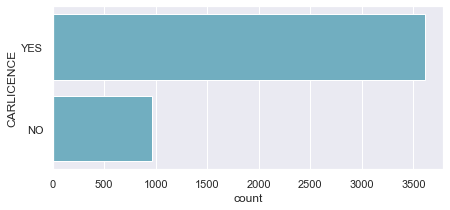

In [51]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="CARLICENCE", data=df_active, color="c");

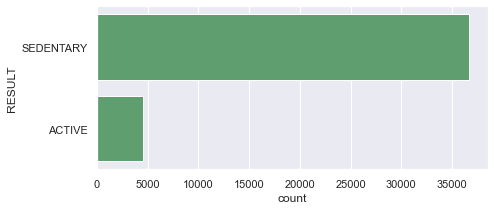

In [52]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="RESULT", data=df1, color="g");

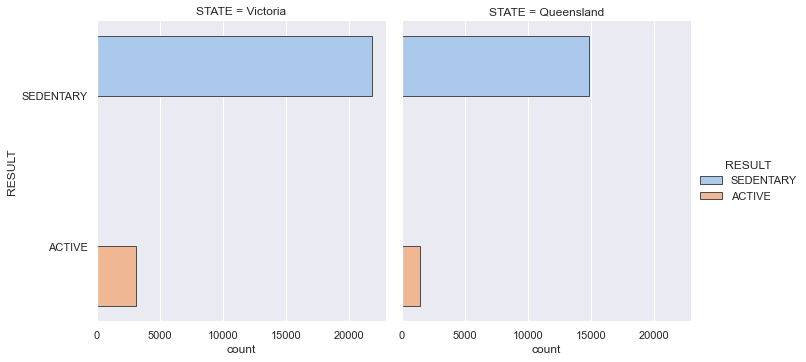

In [53]:
sns.catplot(y="RESULT", hue="RESULT", kind="count",palette="pastel", edgecolor=".3",col = "STATE" ,data=df1);

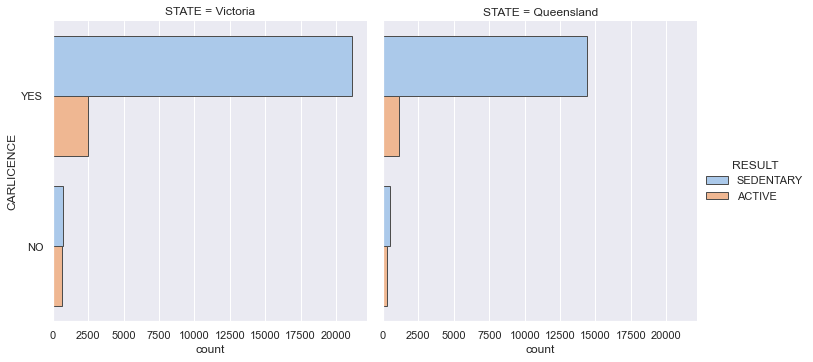

In [54]:
sns.catplot(y="CARLICENCE", hue="RESULT", kind="count",palette="pastel", edgecolor=".3",col = "STATE" ,data=df1);

In [55]:
df_vic= df1[df1['STATE'] == 'Victoria']

In [56]:
df_qld = df1[df1['STATE'] == 'Queensland'] 

In [57]:
len(df1.SA1_code.unique())

3558

In [58]:
len(df1.SA2_code.unique())

514

In [59]:
len(df1.SA3_code.unique())

105

In [60]:
#sns.catplot(y="SA1_code", hue="RESULT", kind="count",palette="pastel", edgecolor=".6", data=df1);

In [61]:
vic_stat = pd.read_csv("MB_2011_VIC.csv")
vic_stat.head()

,MB_CODE_2011,MB_CATEGORY_2011,SA1_MAINCODE_2011,SA1_7DIGITCODE_2011,SA2_MAINCODE_2011,SA2_5DIGITCODE_2011,SA2_NAME_2011,SA3_CODE_2011,SA3_NAME_2011,SA4_CODE_2011,SA4_NAME_2011,GCCSA_CODE_2011,GCCSA_NAME_2011,STATE_CODE_2011,STATE_NAME_2011,AREA_ALBERS_SQM
0,20000009499,NOUSUALRESIDENCE,29999949999,2949999,299999499,29499,No usual address (Vic.),29999,Special Purpose Codes SA3 (Vic.),299,Special Purpose Codes SA4 (Vic.),29499,No usual address (Vic.),2,Victoria,NaN
1,20000010000,Education,20403106914,2106914,204031069,21069,Bright - Mount Beauty,20403,Wodonga - Alpine,204,Hume,2RVIC,Rest of Vic.,2,Victoria,12659.94847
2,20000021000,Commercial,20403106902,2106902,204031069,21069,Bright - Mount Beauty,20403,Wodonga - Alpine,204,Hume,2RVIC,Rest of Vic.,2,Victoria,12734.45755
3,20000022000,Commercial,20403106902,2106902,204031069,21069,Bright - Mount Beauty,20403,Wodonga - Alpine,204,Hume,2RVIC,Rest of Vic.,2,Victoria,10504.33849
4,20000023000,Commercial,20403106902,2106902,204031069,21069,Bright - Mount Beauty,20403,Wodonga - Alpine,204,Hume,2RVIC,Rest of Vic.,2,Victoria,10471.23714


In [62]:
qld_stat = pd.read_csv("./MB_2011_QLD.csv")

In [63]:
vic_stat.columns

Index(['MB_CODE_2011', 'MB_CATEGORY_2011', 'SA1_MAINCODE_2011',
       'SA1_7DIGITCODE_2011', 'SA2_MAINCODE_2011', 'SA2_5DIGITCODE_2011',
       'SA2_NAME_2011', 'SA3_CODE_2011', 'SA3_NAME_2011', 'SA4_CODE_2011',
       'SA4_NAME_2011', 'GCCSA_CODE_2011', 'GCCSA_NAME_2011',
       'STATE_CODE_2011', 'STATE_NAME_2011', 'AREA_ALBERS_SQM'],
      dtype='object')

In [64]:
vic_stat.drop(['MB_CODE_2011','MB_CATEGORY_2011','SA1_MAINCODE_2011','SA2_MAINCODE_2011','SA4_CODE_2011',
       'SA4_NAME_2011','GCCSA_CODE_2011','GCCSA_NAME_2011','STATE_CODE_2011','STATE_NAME_2011','AREA_ALBERS_SQM'], axis = 1, inplace = True)

In [65]:
df.head()

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT
0,40,FEMALE,YES,YES,4,0,1,2100106,1500,21001,158,20101,213,Victoria,0.0,8.75,NA,NA,SEDENTARY
1,73,MALE,NO,YES,2,1,1,2100108,703,21001,158,20101,213,Victoria,0.0,25.00,NA,NA,SEDENTARY
2,85,FEMALE,NO,YES,1,1,1,2100108,703,21001,158,20101,213,Victoria,0.0,8.75,NA,NA,SEDENTARY
3,34,FEMALE,YES,YES,3,1,3,2100108,703,21001,158,20101,213,Victoria,0.0,19.75,NA,NA,SEDENTARY
4,68,MALE,NO,YES,3,2,3,2100108,703,21001,158,20101,213,Victoria,0.0,24.25,NA,NA,SEDENTARY


In [66]:
vic_stat.head()

,SA1_7DIGITCODE_2011,SA2_5DIGITCODE_2011,SA2_NAME_2011,SA3_CODE_2011,SA3_NAME_2011
0,2949999,29499,No usual address (Vic.),29999,Special Purpose Codes SA3 (Vic.)
1,2106914,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
2,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
3,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
4,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine


In [67]:
vic_stat = vic_stat.rename(columns={'SA1_7DIGITCODE_2011': 'SA1_code', 'SA2_5DIGITCODE_2011': 'SA2_code', 'SA2_NAME_2011':'SA2_name','SA3_CODE_2011':'SA3_code','SA3_NAME_2011':'SA3_name'})

In [68]:
vic_stat

,SA1_code,SA2_code,SA2_name,SA3_code,SA3_name
0,2949999,29499,No usual address (Vic.),29999,Special Purpose Codes SA3 (Vic.)
1,2106914,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
2,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
3,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
4,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
...,...,...,...,...,...
81372,2979993,29799,Migratory - Offshore - Shipping (Vic.),29797,Migratory - Offshore - Shipping (Vic.)
81373,2979993,29799,Migratory - Offshore - Shipping (Vic.),29797,Migratory - Offshore - Shipping (Vic.)
81374,2979993,29799,Migratory - Offshore - Shipping (Vic.),29797,Migratory - Offshore - Shipping (Vic.)
81375,2979991,29799,Migratory - Offshore - Shipping (Vic.),29797,Migratory - Offshore - Shipping (Vic.)


In [69]:
def get_names(sacode, col1_name, col2_name):
    elements = list(vic_stat[vic_stat[col1_name]==sacode][col2_name].unique())
    if len(elements)==0:
        pass
    else:
        return elements[0]

In [70]:
%%time
df_vic['SA2_NAME'] = df_vic.apply(lambda x:get_names(x['SA2_code'], 'SA2_code', 'SA2_name'), axis=1)
df_vic['SA3_NAME'] = df_vic.apply(lambda x:get_names(x['SA3_code'], 'SA3_code', 'SA3_name'), axis=1)

C:\Users\bhave\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Wall time: 54.2 s


C:\Users\bhave\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
df1[['SA2_code','SA2_NAME','SA3_code','SA3_NAME']]

,SA2_code,SA2_NAME,SA3_code,SA3_NAME
0,21001,NA,20101,NA
1,21001,NA,20101,NA
2,21001,NA,20101,NA
3,21001,NA,20101,NA
4,21001,NA,20101,NA
...,...,...,...,...
41539,31444,NA,31606,NA
41540,31444,NA,31606,NA
41541,31444,NA,31606,NA
41542,31444,NA,31606,NA


In [72]:
qld_stat.columns

Index(['MB_CODE_2011', 'MB_CATEGORY_2011', 'SA1_MAINCODE_2011',
       'SA1_7DIGITCODE_2011', 'SA2_MAINCODE_2011', 'SA2_5DIGITCODE_2011',
       'SA2_NAME_2011', 'SA3_CODE_2011', 'SA3_NAME_2011', 'SA4_CODE_2011',
       'SA4_NAME_2011', 'GCCSA_CODE_2011', 'GCCSA_NAME_2011',
       'STATE_CODE_2011', 'STATE_NAME_2011', 'AREA_ALBERS_SQM'],
      dtype='object')

In [73]:
qld_stat.drop(['MB_CODE_2011','MB_CATEGORY_2011','SA1_MAINCODE_2011','SA2_MAINCODE_2011','SA4_CODE_2011',
       'SA4_NAME_2011','GCCSA_CODE_2011','GCCSA_NAME_2011','STATE_CODE_2011','STATE_NAME_2011','AREA_ALBERS_SQM'], axis = 1, inplace = True)

In [74]:
qld_stat.head()

,SA1_7DIGITCODE_2011,SA2_5DIGITCODE_2011,SA2_NAME_2011,SA3_CODE_2011,SA3_NAME_2011
0,3949999,39499,No usual address (Qld),39999,Special Purpose Codes SA3 (Qld)
1,3148912,31489,Townsville - South,31802,Townsville
2,3148912,31489,Townsville - South,31802,Townsville
3,3148912,31489,Townsville - South,31802,Townsville
4,3140809,31408,Barcaldine - Blackall,31503,Outback - South


In [75]:
qld_stat = qld_stat.rename(columns={'SA1_7DIGITCODE_2011': 'SA1_code', 'SA2_5DIGITCODE_2011': 'SA2_code', 'SA2_NAME_2011':'SA2_name','SA3_CODE_2011':'SA3_code','SA3_NAME_2011':'SA3_name'})

In [76]:
qld_stat.head()

,SA1_code,SA2_code,SA2_name,SA3_code,SA3_name
0,3949999,39499,No usual address (Qld),39999,Special Purpose Codes SA3 (Qld)
1,3148912,31489,Townsville - South,31802,Townsville
2,3148912,31489,Townsville - South,31802,Townsville
3,3148912,31489,Townsville - South,31802,Townsville
4,3140809,31408,Barcaldine - Blackall,31503,Outback - South


In [77]:
def get_names(sacode, col1_name, col2_name):
    elements = list(qld_stat[qld_stat[col1_name]==sacode][col2_name].unique())
    if len(elements)==0:
        pass
    else:
        return elements[0]

In [78]:
%%time
df_qld['SA2_NAME'] = df_qld.apply(lambda x:get_names(x['SA2_code'], 'SA2_code', 'SA2_name'), axis=1)
df_qld['SA3_NAME'] = df_qld.apply(lambda x:get_names(x['SA3_code'], 'SA3_code', 'SA3_name'), axis=1)

C:\Users\bhave\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Wall time: 35.8 s


C:\Users\bhave\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
print(df[['SA2_NAME','RESULT']].groupby(['SA2_NAME'], as_index = False))

In [80]:
vic_results_sa2 = pd.DataFrame(df_vic.groupby('SA2_NAME')['RESULT'].value_counts())

In [81]:
vic_results_sa2

RESULT
SA2_NAME      RESULT           
Abbotsford    SEDENTARY      26
              ACTIVE         11
Airport West  SEDENTARY      21
              ACTIVE          8
Albert Park   SEDENTARY      78
...                         ...
Yarra - North ACTIVE         39
Yarra Valley  SEDENTARY      69
              ACTIVE          2
Yarraville    SEDENTARY      53
              ACTIVE         27

[576 rows x 1 columns]

In [82]:
vic_results_sa2.to_excel("vic_sa2.xlsx",sheet_name='vic_sa2')

In [83]:
vic_results_sa3 = pd.DataFrame(df_vic.groupby('SA3_NAME')['RESULT'].value_counts())

In [84]:
vic_results_sa3

RESULT
SA3_NAME     RESULT           
Ballarat     SEDENTARY    1279
             ACTIVE        105
Banyule      SEDENTARY     530
             ACTIVE         83
Baw Baw      SEDENTARY      18
...                        ...
Wyndham      ACTIVE         37
Yarra        SEDENTARY     303
             ACTIVE        197
Yarra Ranges SEDENTARY     530
             ACTIVE         42

[101 rows x 1 columns]

In [85]:
vic_results_sa3.to_excel("vic_sa3.xlsx",sheet_name='vic_sa3')

In [86]:
qld_results_sa2 = pd.DataFrame(df_qld.groupby('SA2_NAME')['RESULT'].value_counts())

In [87]:
qld_results_sa2

RESULT
SA2_NAME              RESULT           
Alexandra Hills       SEDENTARY      74
                      ACTIVE          1
Algester              SEDENTARY      91
                      ACTIVE          4
Aroona - Currimundi   SEDENTARY     253
...                                 ...
Wynnum West - Hemmant ACTIVE          8
Yeronga               SEDENTARY      71
                      ACTIVE         22
Zillmere              SEDENTARY      37
                      ACTIVE          7

[399 rows x 1 columns]

In [88]:
qld_results_sa2.to_excel("qld_sa2.xlsx",sheet_name='qld_sa2')

In [89]:
qld_results_sa3 = pd.DataFrame(df_qld.groupby('SA3_NAME')['RESULT'].value_counts())
qld_results_sa3

RESULT
SA3_NAME                  RESULT           
Bald Hills - Everton Park SEDENTARY      20
                          ACTIVE          1
Beenleigh                 SEDENTARY      62
                          ACTIVE          1
Bribie - Beachmere        SEDENTARY     264
...                                     ...
Surfers Paradise          ACTIVE         10
The Gap - Enoggera        SEDENTARY      70
                          ACTIVE         15
Wynnum - Manly            SEDENTARY     419
                          ACTIVE         50

[102 rows x 1 columns]

In [90]:
qld_results_sa3.to_excel("qld_sa3.xlsx",sheet_name='qld_sa3')

In [91]:
x = df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 41543
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AGE                 41237 non-null  int64   
 1   GENDER              41237 non-null  object  
 2   ANYWORK             41237 non-null  object  
 3   CARLICENCE          41237 non-null  object  
 4   HHSTRUCTURE         41237 non-null  int64   
 5   HH_CARS             41237 non-null  int64   
 6   HHINC_grp           41237 non-null  int64   
 7   SA1_code            41237 non-null  int64   
 8   PopDensity_SA1      41237 non-null  int64   
 9   SA2_code            41237 non-null  int64   
 10  PopDensity_SA2      41237 non-null  int64   
 11  SA3_code            41237 non-null  int64   
 12  PopDensity_SA3      41237 non-null  int64   
 13  STATE               41237 non-null  object  
 14  ACTIVE_TRAVEL_TIME  41237 non-null  float64 
 15  CAR_TIME            41237 non-null  

In [92]:
df_cluster = df1.copy()

In [93]:
x = df_cluster.iloc[:,10:16:5]
x

,PopDensity_SA2,CAR_TIME
0,158,8.75
1,158,25.00
2,158,8.75
3,158,19.75
4,158,24.25
...,...,...
41539,88,19.25
41540,88,10.50
41541,88,15.00
41542,88,17.50


In [94]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [95]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')

In [96]:
kmeans.fit(x_scaled)

KMeans(algorithm='elkan', n_clusters=6, random_state=111)

In [97]:
identified_clusters = kmeans.fit_predict(x_scaled)
identified_clusters

array([1, 2, 1, ..., 1, 1, 1])

In [98]:
data_with_clusters = df_cluster.copy()
data_with_clusters['cluster'] = identified_clusters
#data_with_clusters

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
encode = LabelEncoder()
encode.fit(data_with_clusters['STATE'])
data_with_clusters['STATE'] = encode.transform(data_with_clusters['STATE'])

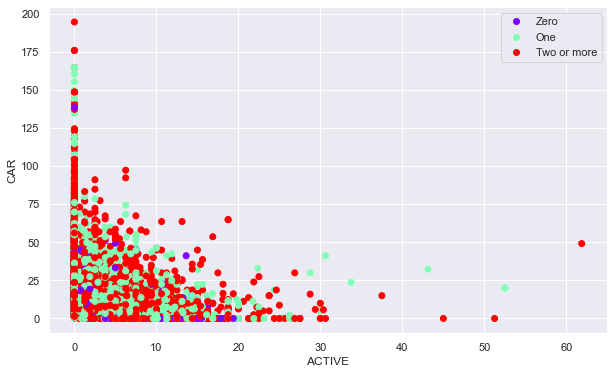

In [168]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(data_with_clusters['ACTIVE_TRAVEL_TIME'], data_with_clusters['CAR_TIME'] ,c = data_with_clusters['HH_CARS'], cmap = "rainbow")
plt.xlabel('ACTIVE'), plt.ylabel('CAR') 
classes = ['Zero Cars', 'One', 'Two or more']

#plt.legend(*scatter.legend_elements())
plt.legend(handles = scatter.legend_elements()[0],labels = classes)

plt.show()

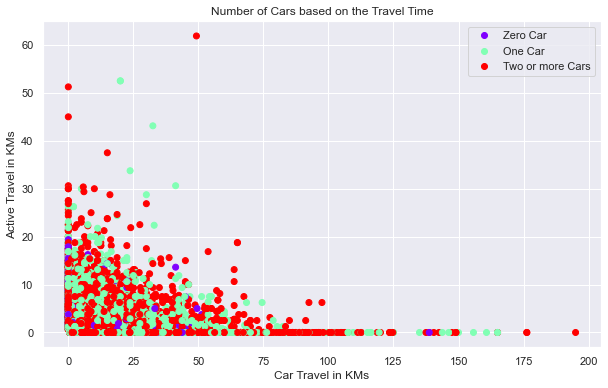

In [172]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(data_with_clusters['CAR_TIME'], data_with_clusters['ACTIVE_TRAVEL_TIME'] ,c = data_with_clusters['HH_CARS'], cmap = "rainbow")
plt.xlabel('Car Travel in KMs'), plt.ylabel('Active Travel in KMs') 
classes = ['Zero Car', 'One Car', 'Two or more Cars']

#plt.legend(*scatter.legend_elements())
plt.legend(handles = scatter.legend_elements()[0],labels = classes)
plt.title("Number of Cars based on the Travel Time")

plt.show()

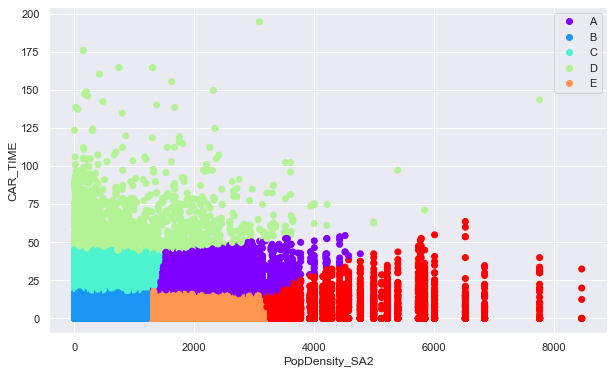

In [109]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(data_with_clusters['PopDensity_SA2'], data_with_clusters['CAR_TIME'], c = data_with_clusters['cluster'], cmap = "rainbow")
plt.ylabel('CAR_TIME') , plt.xlabel('PopDensity_SA2')
classes = ['A', 'B', 'C','D','E']

#plt.legend(*scatter.legend_elements())
plt.legend(handles = scatter.legend_elements()[0],labels = classes)

plt.show()

In [ ]:
# Selecting the number of clusters

In [ ]:
kmeans.inertia_

In [ ]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [ ]:
wcss

In [ ]:
#the elbow method

In [ ]:
number_clusters = range(1,20,1)
plt.plot(number_clusters,wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Sum sq")

In [ ]:
dendo = df1.copy()

In [ ]:
dendo.info()

In [ ]:
dendo = dendo[['ACTIVE_TRAVEL_TIME', 'CAR_TIME','AGE_RANGE']]

In [ ]:
dendo.set_index('AGE_RANGE', inplace=True)

In [ ]:
x = dendo

In [ ]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [ ]:
x_scaled

In [ ]:
sns.clustermap(x_scaled,cmap = 'mako')